Planteamiento del problema   
Una empresa automovilística china, Geely Auto, aspira a entrar en el mercado estadounidense estableciendo allí su unidad de fabricación y produciendo automóviles localmente para competir con sus contrapartes estadounidenses y europeas.

Han contratado a una empresa de consultoría de automóviles para comprender los factores de los que depende el precio de los automóviles. Específicamente, quieren comprender los factores que afectan el precio de los automóviles en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. La empresa quiere saber:

¿Qué variables son significativas para predecir el precio de un automóvil?

Qué tan bien esas variables describen el precio de un automóvil
Con base en varias encuestas de mercado, la consultora ha recopilado un gran conjunto de datos de diferentes tipos de automóviles en todo el mercado estadounidense.

Objetivo comercial    
Estamos obligados a modelar el precio de los automóviles con las variables independientes disponibles. La gerencia lo utilizará para comprender cómo varían exactamente los precios con las variables independientes. En consecuencia, pueden manipular el diseño de los automóviles, la estrategia comercial, etc. para cumplir con ciertos niveles de precios. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

In [1]:
#importar bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#leer datos
df = pd.read_csv("CarPrice_Assignment.csv" , sep = "," , encoding = 'utf-8')

In [3]:
# mostrando todas las columnas
pd.set_option("display.max_columns", None)
# conociendo mis datos
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#algo de información sobre la estructura de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# algunas estadísticas resumidas sobre los datos
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# verificar si faltan valores

In [6]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Genial...! no hay valores faltantes**

# Codificación y preprocesamiento

In [7]:
pip install word2number

  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5583 sha256=a43265c4186bcd95feedb449b0a66f9727fa47658faf15448cbc4746b51164f7
  Stored in directory: c:\users\10\appdata\local\pip\cache\wheels\a0\4a\5b\d2f2df5c344ddbecb8bea759872c207ea91d93f57fb54e816e
Successfully built word2number
Note: you may need to restart the kernel to use updated packages.


In [8]:
# cambiar cada palabra numérica por su número como 'cuatro' a 4
from word2number import w2n
df.doornumber = df.doornumber.apply(w2n.word_to_num)
df.cylindernumber = df.cylindernumber.apply(w2n.word_to_num)

In [9]:
df.doornumber , df.cylindernumber

(0      2
 1      2
 2      2
 3      4
 4      4
       ..
 200    4
 201    4
 202    4
 203    4
 204    4
 Name: doornumber, Length: 205, dtype: int64,
 0      4
 1      4
 2      6
 3      4
 4      5
       ..
 200    4
 201    4
 202    6
 203    6
 204    4
 Name: cylindernumber, Length: 205, dtype: int64)

In [10]:
# elimina la columna de identificación ya que no ayudará en la predicción
df = df.drop('car_ID', axis=1)

In [11]:
# comprobando los nombres de las columnas que queremos cambiar 
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
# cambiar el nombre de las columnas para ganar más legibilidad
df.rename(columns = {'CarName':'nombre_carro','fueltype':'tipo_combustible', 'doornumber':'numero_puertas', 'carbody':'carBody','drivewheel':'volante',
                     'enginelocation':'ubicación_del_motor', 'wheelbase':'distancia_entre_ejes', 'carlength': 'longitud_del_coche',
                     'carwidth':'ancho_de_coche', 'carheight':'altura_del_coche', 'curbweight':'peso_en_vacío', 'enginetype':'tipo_de_motor',
                     'cylindernumber':'numero_de_cilindro', 'enginesize':'tamaño_de_maquina', 'fuelsystem':'Sistema_de_combustible', 'boreratio':'relacion_aburrimiento',
                     'compressionratio':'indice_compresion', 'horsepower':'caballo_de_fuerza', 'peakrpm':'rpm_maximas',
                     'citympg':'millas_por_galon', "highwaympg":'millas_galon_carretera'},inplace = True)

In [13]:
# verifique los cambios que hicimos hasta ahora
df.head()

,symboling,nombre_carro,tipo_combustible,aspiration,numero_puertas,carBody,volante,ubicación_del_motor,distancia_entre_ejes,longitud_del_coche,ancho_de_coche,altura_del_coche,peso_en_vacío,tipo_de_motor,numero_de_cilindro,tamaño_de_maquina,Sistema_de_combustible,relacion_aburrimiento,stroke,indice_compresion,caballo_de_fuerza,rpm_maximas,millas_por_galon,millas_galon_carretera,price
0,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   nombre_carro            205 non-null    object 
 2   tipo_combustible        205 non-null    object 
 3   aspiration              205 non-null    object 
 4   numero_puertas          205 non-null    int64  
 5   carBody                 205 non-null    object 
 6   volante                 205 non-null    object 
 7   ubicación_del_motor     205 non-null    object 
 8   distancia_entre_ejes    205 non-null    float64
 9   longitud_del_coche      205 non-null    float64
 10  ancho_de_coche          205 non-null    float64
 11  altura_del_coche        205 non-null    float64
 12  peso_en_vacío           205 non-null    int64  
 13  tipo_de_motor           205 non-null    object 
 14  numero_de_cilindro      205 non-null    in

In [15]:
# obtener columnas con tipo de objeto para preparar la codificación
df.select_dtypes('object')

,nombre_carro,tipo_combustible,aspiration,carBody,volante,ubicación_del_motor,tipo_de_motor,Sistema_de_combustible
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi
202,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


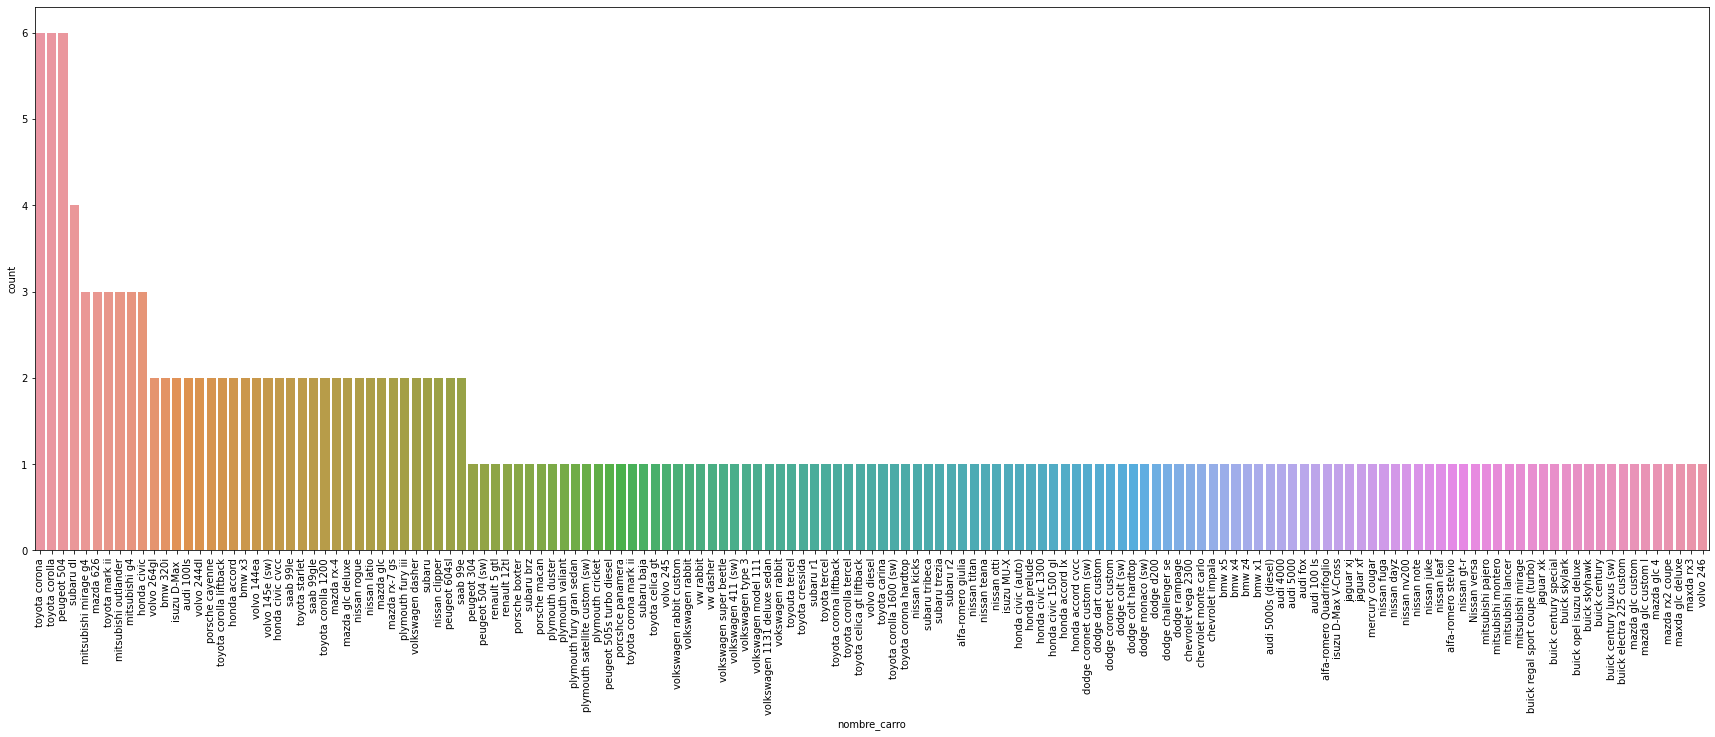

In [16]:
# ¿Qué nombre de coche se repite más en el conjunto de datos?
plt.figure(figsize = [30, 10])
sns.countplot(df["nombre_carro"],order = df["nombre_carro"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'show which more using Fuel Type ')

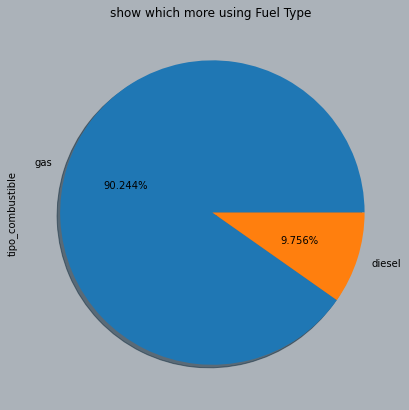

In [17]:
#mostrar cuál  tipo de combustible es el mas utilizado
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
df["tipo_combustible"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("show which more using Fuel Type ")

In [18]:
# El precio medio depende del tipo de combustible.

FP = df.groupby("tipo_combustible")["price"].mean()
FP

tipo_combustible
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<AxesSubplot:xlabel='tipo_combustible'>

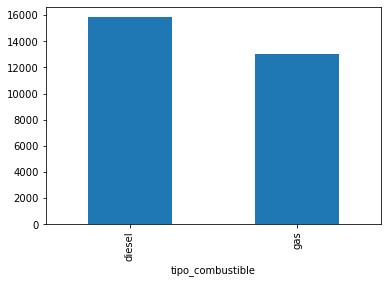

In [19]:
# create graph 
FP.plot(kind="bar")

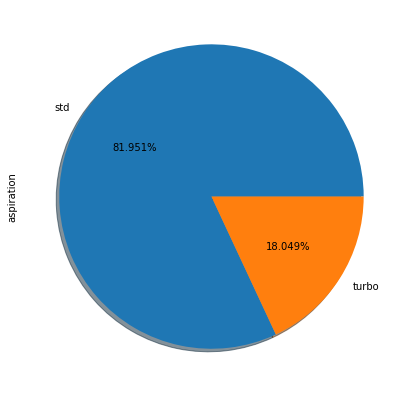

In [20]:
# Cuál es la mayor cantidad de repeticiones de aspiración en el conjunto de datos [auto estándar o auto turbo]

plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff")
df["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [21]:
# El precio promedio depende de Estándar o Turbo

SP = df.groupby("aspiration")["price"].mean()
SP

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<AxesSubplot:xlabel='aspiration'>

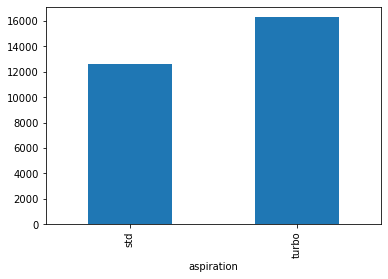

In [22]:
# grafica
SP.plot(kind="bar")

In [23]:
df[['tamaño_de_maquina','price']].head()

,tamaño_de_maquina,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


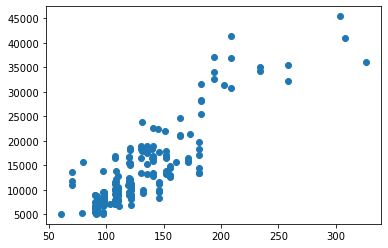

In [24]:
plt.scatter(df.tamaño_de_maquina, df.price)
#there is positive relation between car engine size and car price

## value counts before encoding

In [25]:
[df['tipo_combustible'].value_counts(), df['aspiration'].value_counts(),  df['carBody'].value_counts(), df['volante'].value_counts(),
df['ubicación_del_motor'].value_counts(), df['tipo_de_motor'].value_counts(), df['Sistema_de_combustible'].value_counts() ]

[gas       185
 diesel     20
 Name: tipo_combustible, dtype: int64,
 std      168
 turbo     37
 Name: aspiration, dtype: int64,
 sedan          96
 hatchback      70
 wagon          25
 hardtop         8
 convertible     6
 Name: carBody, dtype: int64,
 fwd    120
 rwd     76
 4wd      9
 Name: volante, dtype: int64,
 front    202
 rear       3
 Name: ubicación_del_motor, dtype: int64,
 ohc      148
 ohcf      15
 ohcv      13
 dohc      12
 l         12
 rotor      4
 dohcv      1
 Name: tipo_de_motor, dtype: int64,
 mpfi    94
 2bbl    66
 idi     20
 1bbl    11
 spdi     9
 4bbl     3
 mfi      1
 spfi     1
 Name: Sistema_de_combustible, dtype: int64]

In [26]:
# transformar columnas de categorías a números
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tipo_combustible']=le.fit_transform(df['tipo_combustible'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['carBody']=le.fit_transform(df['carBody'])
df['volante']=le.fit_transform(df['volante'])
df['ubicación_del_motor']=le.fit_transform(df['ubicación_del_motor'])
df['tipo_de_motor']=le.fit_transform(df['tipo_de_motor'])
df['Sistema_de_combustible']=le.fit_transform(df['Sistema_de_combustible'])
df

,symboling,nombre_carro,tipo_combustible,aspiration,numero_puertas,carBody,volante,ubicación_del_motor,distancia_entre_ejes,longitud_del_coche,ancho_de_coche,altura_del_coche,peso_en_vacío,tipo_de_motor,numero_de_cilindro,tamaño_de_maquina,Sistema_de_combustible,relacion_aburrimiento,stroke,indice_compresion,caballo_de_fuerza,rpm_maximas,millas_por_galon,millas_galon_carretera,price
0,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),1,0,4,3,2,0,109.1,188.8,68.9,55.5,2952,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,1,1,4,3,2,0,109.1,188.8,68.8,55.5,3049,3,4,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,1,0,4,3,2,0,109.1,188.8,68.9,55.5,3012,5,6,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,0,1,4,3,2,0,109.1,188.8,68.9,55.5,3217,3,6,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


## value counts after encoding

In [27]:
[df['tipo_combustible'].value_counts(), df['aspiration'].value_counts(),  df['carBody'].value_counts(), df['volante'].value_counts(),
df['ubicación_del_motor'].value_counts(), df['tipo_de_motor'].value_counts(), df['Sistema_de_combustible'].value_counts() ]

[1    185
 0     20
 Name: tipo_combustible, dtype: int64,
 0    168
 1     37
 Name: aspiration, dtype: int64,
 3    96
 2    70
 4    25
 1     8
 0     6
 Name: carBody, dtype: int64,
 1    120
 2     76
 0      9
 Name: volante, dtype: int64,
 0    202
 1      3
 Name: ubicación_del_motor, dtype: int64,
 3    148
 4     15
 5     13
 0     12
 2     12
 6      4
 1      1
 Name: tipo_de_motor, dtype: int64,
 5    94
 1    66
 3    20
 0    11
 6     9
 2     3
 4     1
 7     1
 Name: Sistema_de_combustible, dtype: int64]

## Comprobar valores atípicos

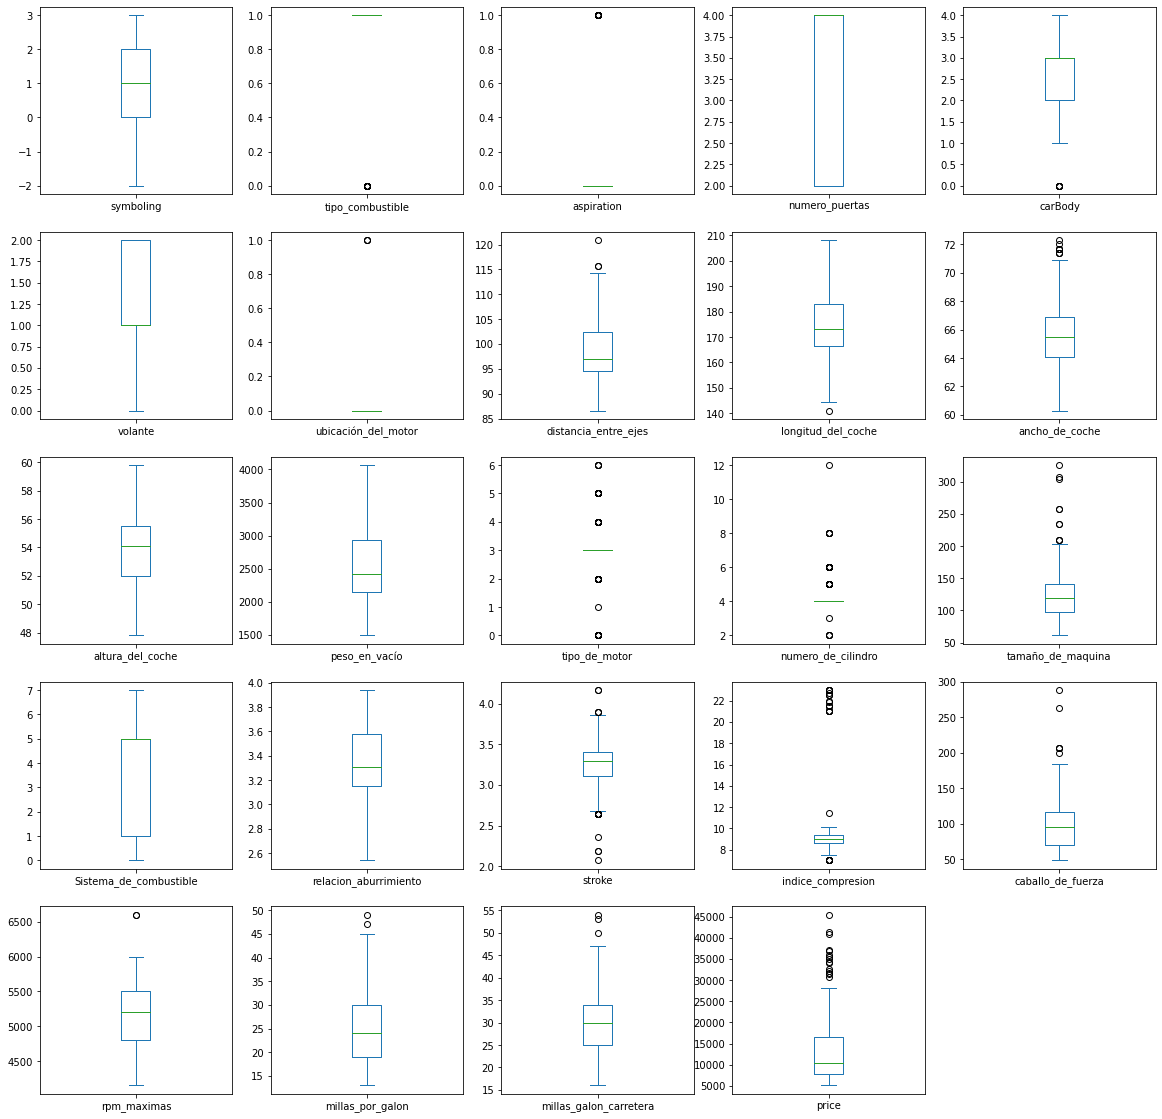

In [28]:
df.plot(kind="box", subplots=True, layout=(5,5), figsize=(20,20))
plt.show()

**TODO ESTO no lo consideraremos como valores atípicos porque obviamente es un dato real no corrupto** 

## correlación entre columnas

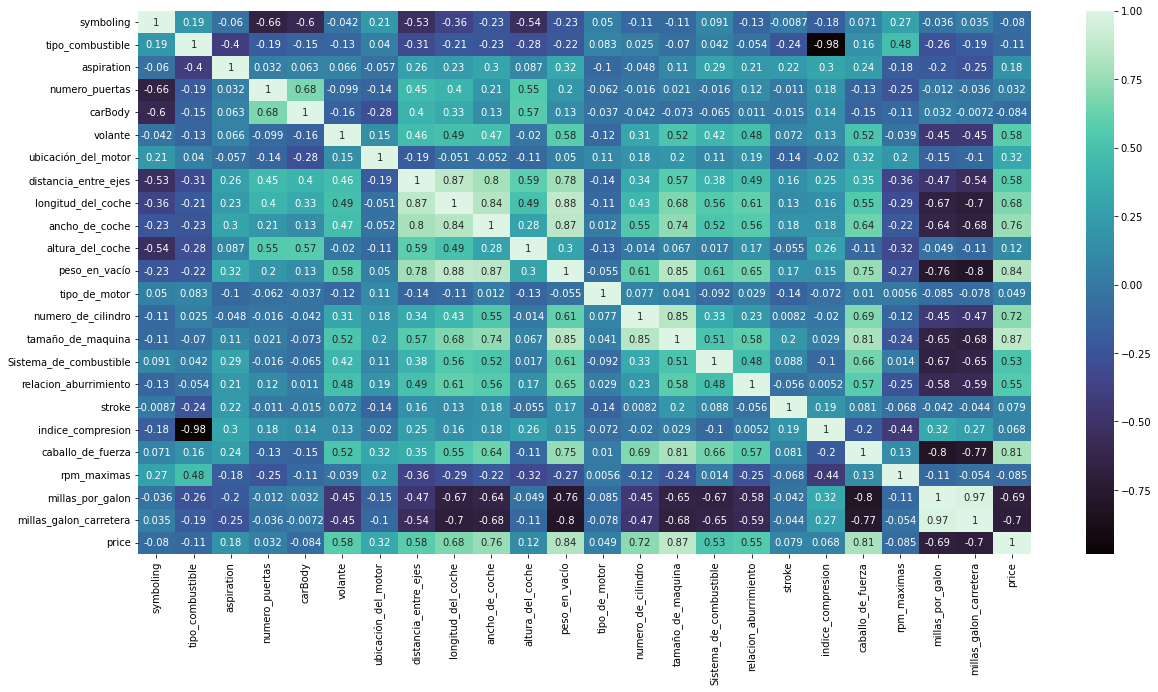

In [29]:
# heatmap to know if there is a Correlation between any columns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot= True,cmap = 'mako')
plt.show()

## dividir datos

In [30]:
df.columns

Index(['symboling', 'nombre_carro', 'tipo_combustible', 'aspiration',
       'numero_puertas', 'carBody', 'volante', 'ubicación_del_motor',
       'distancia_entre_ejes', 'longitud_del_coche', 'ancho_de_coche',
       'altura_del_coche', 'peso_en_vacío', 'tipo_de_motor',
       'numero_de_cilindro', 'tamaño_de_maquina', 'Sistema_de_combustible',
       'relacion_aburrimiento', 'stroke', 'indice_compresion',
       'caballo_de_fuerza', 'rpm_maximas', 'millas_por_galon',
       'millas_galon_carretera', 'price'],
      dtype='object')

In [31]:
# seleccionando las columnas que usaré en el modelo
cars = df[['symboling', 'tipo_combustible', 'aspiration', 'numero_puertas',
       'carBody', 'volante', 'ubicación_del_motor', 'distancia_entre_ejes', 'longitud_del_coche',
       'ancho_de_coche', 'altura_del_coche', 'peso_en_vacío', 'tipo_de_motor',
       'tamaño_de_maquina', 'Sistema_de_combustible', 'relacion_aburrimiento', 'stroke', 'indice_compresion',
       'caballo_de_fuerza', 'rpm_maximas', 'millas_por_galon', 'millas_galon_carretera', 'price']]

# suelte la columna de destino en la variable x
x = cars.drop(['price'] , axis = 1).values
# guardar la columna de destino en la variable y
y = cars['price'].values

## Train test split

In [32]:
from sklearn.model_selection import train_test_split

# dividir mis datos para entrenar y probar con una proporción de 30:70
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.30 , random_state = 42)

## Scaling

In [33]:
from sklearn.preprocessing import RobustScaler

# escalando los datos
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## Modelo de regresión lineal

In [34]:
from sklearn import linear_model

# realizando el modelo de regresión lineal
reg = linear_model.LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [35]:
reg.score(x_train , y_train) , reg.score(x_test , y_test)

(0.8998132583142773, 0.7990085382550234)

In [36]:
pd.DataFrame(reg.coef_ , cars.columns[:-1] , columns=['Coeficient'])

,Coeficient
symboling,551.636613
tipo_combustible,5724.736170
aspiration,1271.349317
numero_puertas,1739.818494
carBody,-1207.249130
volante,1169.630917
ubicación_del_motor,9985.235680
distancia_entre_ejes,1187.762757
longitud_del_coche,-1286.077816
ancho_de_coche,2357.860859


In [37]:
#Predesimos los precios
y_pred = reg.predict(x_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df1.head(10)

,Y_test,Y_pred
0,30760.000,24136.060295
1,17859.167,16535.100211
2,9549.000,11110.562945
3,11850.000,13984.349928
4,28248.000,24814.695097
5,7799.000,7748.944557
6,7788.000,9629.553100
7,9258.000,8730.033148
8,10198.000,10424.646992
9,7775.000,8583.254597


In [38]:
from sklearn.metrics import r2_score
reg_score = r2_score(y_test , y_pred)
reg_score

0.7990085382550234

In [39]:
from sklearn.metrics import mean_absolute_percentage_error 
mpae = mean_absolute_percentage_error(y_test , y_pred)
mpae

0.23278404204859413

<AxesSubplot:>

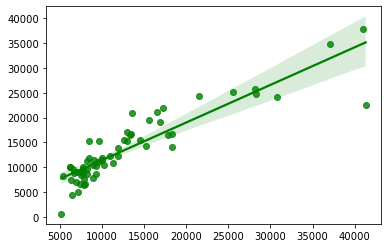

In [40]:
sns.regplot(x=y_test,y=y_pred, color='green')

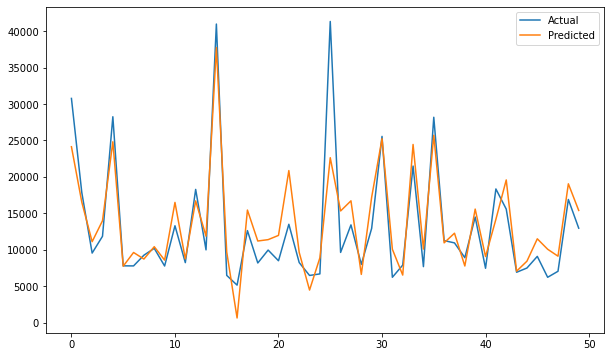

In [41]:
plt.figure(figsize=(10,6))
plt.plot(df1[:50])
plt.legend(['Actual' , 'Predicted'])
plt.show()

## **Regresión de cresta*

In [42]:
rid = linear_model.Ridge(alpha=0.5)
rid.fit(x_train , y_train)

print(rid.score(x_train , y_train))
print(rid.score(x_test , y_test))

0.8982527225715127
0.8045188635955096


In [43]:
pd.DataFrame(rid.coef_ , cars.columns[:-1] , columns=['Coeficient'])

,Coeficient
symboling,593.352558
tipo_combustible,898.739200
aspiration,720.531082
numero_puertas,1718.663950
carBody,-1266.989850
volante,1153.591664
ubicación_del_motor,7058.773624
distancia_entre_ejes,1072.270135
longitud_del_coche,-889.888007
ancho_de_coche,2109.467264


In [44]:
y_pred2 = rid.predict(x_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred2" : y_pred2})
df.head(10)

,symboling,nombre_carro,tipo_combustible,aspiration,numero_puertas,carBody,volante,ubicación_del_motor,distancia_entre_ejes,longitud_del_coche,ancho_de_coche,altura_del_coche,peso_en_vacío,tipo_de_motor,numero_de_cilindro,tamaño_de_maquina,Sistema_de_combustible,relacion_aburrimiento,stroke,indice_compresion,caballo_de_fuerza,rpm_maximas,millas_por_galon,millas_galon_carretera,price
0,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,5,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,1,0,4,3,1,0,105.8,192.7,71.4,55.7,2844,3,5,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,1,0,4,4,1,0,105.8,192.7,71.4,55.7,2954,3,5,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,1,1,4,3,1,0,105.8,192.7,71.4,55.9,3086,3,5,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),1,1,2,2,0,0,99.5,178.2,67.9,52.0,3053,3,5,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


In [45]:
mpae = mean_absolute_percentage_error(y_test , y_pred2)
mpae

0.23088173915602284

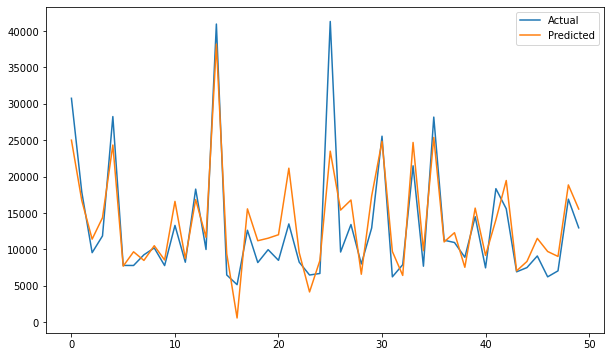

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df1[:50])
plt.legend(['Actual' , 'Predicted'])
plt.show()

## Lasso regression 

In [47]:
las = linear_model.Lasso(alpha=0.9)
las.fit(x_train , y_train)

print(las.score(x_train , y_train))
print(las.score(x_test , y_test))

0.8997855083312014
0.8009169036621551


In [48]:
pd.DataFrame(las.coef_ , cars.columns[:-1] , columns=['Coeficient'])
y_pred3 = las.predict(x_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred3" : y_pred3})
df.head(10)

,symboling,nombre_carro,tipo_combustible,aspiration,numero_puertas,carBody,volante,ubicación_del_motor,distancia_entre_ejes,longitud_del_coche,ancho_de_coche,altura_del_coche,peso_en_vacío,tipo_de_motor,numero_de_cilindro,tamaño_de_maquina,Sistema_de_combustible,relacion_aburrimiento,stroke,indice_compresion,caballo_de_fuerza,rpm_maximas,millas_por_galon,millas_galon_carretera,price
0,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,2,audi fox,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,5,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,1,audi 100ls,1,0,4,3,1,0,105.8,192.7,71.4,55.7,2844,3,5,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,1,audi 5000,1,0,4,4,1,0,105.8,192.7,71.4,55.7,2954,3,5,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,1,audi 4000,1,1,4,3,1,0,105.8,192.7,71.4,55.9,3086,3,5,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,0,audi 5000s (diesel),1,1,2,2,0,0,99.5,178.2,67.9,52.0,3053,3,5,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


In [49]:
mpae = mean_absolute_percentage_error(y_test , y_pred3)
mpae

0.23167056380559817

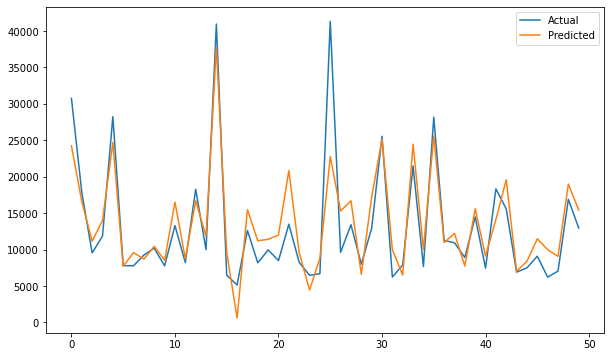

In [50]:
plt.figure(figsize=(10,6))
plt.plot(df1[:50])
plt.legend(['Actual' , 'Predicted'])
plt.show()

## Bayesian Ridge

In [51]:
B_reg = linear_model.BayesianRidge()
B_reg.fit(x_train , y_train)

print(B_reg.score(x_train , y_train))
print(B_reg.score(x_test , y_test))

0.8903155003080262
0.7995893295385917


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[['symboling', 'tipo_combustible', 'aspiration', 'numero_puertas',
       'carBody', 'volante', 'ubicación_del_motor', 'distancia_entre_ejes', 'longitud_del_coche',
       'ancho_de_coche', 'altura_del_coche', 'peso_en_vacío', 'tipo_de_motor',
       'tamaño_de_maquina', 'Sistema_de_combustible', 'relacion_aburrimiento', 'stroke', 'indice_compresion',
       'caballo_de_fuerza', 'rpm_maximas', 'millas_por_galon', 'millas_galon_carretera', 'price']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

print(vif_data)

                   feature          VIF
0                symboling     3.938082
1         tipo_combustible   685.714948
2               aspiration     3.462903
3           numero_puertas    31.073123
4                  carBody    28.479955
5                  volante    16.968940
6      ubicación_del_motor     1.933490
7     distancia_entre_ejes  2849.111917
8       longitud_del_coche  2358.091409
9           ancho_de_coche  5195.614925
10        altura_del_coche  1201.991554
11           peso_en_vacío   466.922535
12           tipo_de_motor    12.619234
13       tamaño_de_maquina   136.731000
14  Sistema_de_combustible     8.577038
15   relacion_aburrimiento   342.677569
16                  stroke   165.920736
17       indice_compresion   479.941452
18       caballo_de_fuerza   106.459370
19             rpm_maximas   308.343228
20        millas_por_galon   524.108448
21  millas_galon_carretera   590.059848
22                   price    30.202764
